### Lab 4.5: Evaluating the Productivity Shift in Remote vs. On-Site Workforces Using Inferential Statistics



#### **Objective:**
1. Develop and test null and alternative hypotheses to examine productivity differences between remote and on-site workforces.
2. Analyze the impact of well-being on productivity using correlation tests.
3. Evaluate the effect of working hours on productivity using linear regression.



#### **Equipment Required:**
- Jupyter Notebook
- Python (Pandas, NumPy, Seaborn, Matplotlib, SciPy, Statsmodels)



#### **Prerequisites:**
- Basic knowledge of Python
- Familiarity with data analysis and visualization
- Understanding of hypothesis testing and correlation analysis



#### **Problem Statement:**
Evaluate the productivity shift between remote and on-site workforces using statistical methods. Test whether working hours and well-being scores significantly affect productivity levels.


In [1]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, pearsonr
import statsmodels.api as sm


In [2]:

# Load the dataset
file_path = 'remote_work_productivity.csv'
df = pd.read_csv(file_path)

In [3]:


# Display the first few rows of the data
df.head()


,Employee_ID,Employment_Type,Hours_Worked_Per_Week,Productivity_Score,Well_Being_Score
0,1,Remote,29,75,78
1,2,In-Office,45,49,47
2,3,Remote,34,74,89
3,4,Remote,25,81,84
4,5,Remote,50,70,74


In [4]:

# Clean missing values
df.dropna(inplace=True)

In [5]:

# Summary statistics
print(df.describe())


       Employee_ID  Hours_Worked_Per_Week  Productivity_Score  \
count  1000.000000            1000.000000         1000.000000   
mean    500.500000              39.720000           68.602000   
std     288.819436               8.042779           12.235494   
min       1.000000              16.000000           33.000000   
25%     250.750000              34.750000           60.000000   
50%     500.500000              40.000000           68.000000   
75%     750.250000              45.000000           76.000000   
max    1000.000000              64.000000          112.000000   

       Well_Being_Score  
count       1000.000000  
mean          63.975000  
std           13.870572  
min           14.000000  
25%           56.000000  
50%           65.000000  
75%           73.000000  
max          104.000000  


In [9]:
# Hypothesis Testing:
# H0: There is no difference in productivity between remote and on-site workforces
# H1: There is a difference in productivity between remote and on-site workforces

remote = df[df['Employment_Type'] == 'Remote']['Productivity_Score']
on_site = df[df['Employment_Type'] == 'On-Site']['Productivity_Score']

# Check sample size
print(f"Number of Remote Employees: {remote.size}")
print(f"Number of On-Site Employees: {on_site.size}")

if remote.size >= 10 and on_site.size >= 10:
    # Perform t-test if sample sizes are sufficient
    t_stat, p_value = ttest_ind(remote, on_site)
    print(f'T-statistic: {t_stat}, P-value: {p_value}')
else:
    if remote.size > 0 and on_site.size > 0:  # Ensure both samples are not empty
        # Use Mann-Whitney U test if sample size is small
        stat, p_value = mannwhitneyu(remote, on_site)
        print(f'Mann-Whitney U Statistic: {stat}, P-value: {p_value}')
    else:
        print("One or both samples are empty. Test cannot be performed.")


Number of Remote Employees: 490
Number of On-Site Employees: 0
One or both samples are empty. Test cannot be performed.


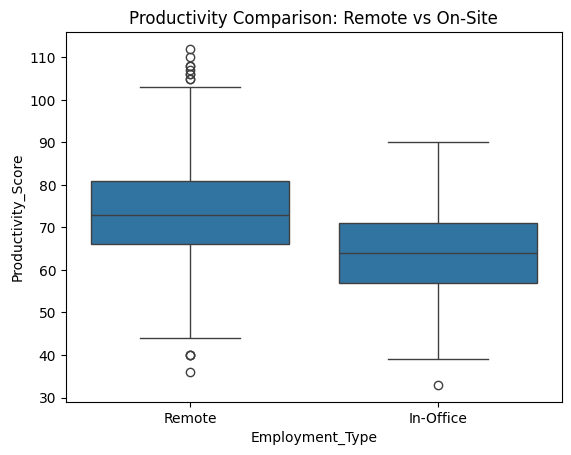

In [10]:

# Visualization
sns.boxplot(x='Employment_Type', y='Productivity_Score', data=df)
plt.title('Productivity Comparison: Remote vs On-Site')
plt.show()


In [11]:

# Correlation between Well-Being Score and Productivity Score
corr, p_value = pearsonr(df['Well_Being_Score'], df['Productivity_Score'])
print(f'Correlation: {corr}, P-value: {p_value}')


Correlation: 0.13516318219943832, P-value: 1.7981626581203487e-05


In [13]:

# Linear Regression: Effect of Working Hours on Productivity
X = df['Hours_Worked_Per_Week']
X = sm.add_constant(X)
Y = df['Productivity_Score']
model = sm.OLS(Y, X).fit()
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:     Productivity_Score   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     69.15
Date:                Thu, 20 Mar 2025   Prob (F-statistic):           2.97e-16
Time:                        15:40:34   Log-Likelihood:                -3889.3
No. Observations:                1000   AIC:                             7783.
Df Residuals:                     998   BIC:                             7792.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    83.98

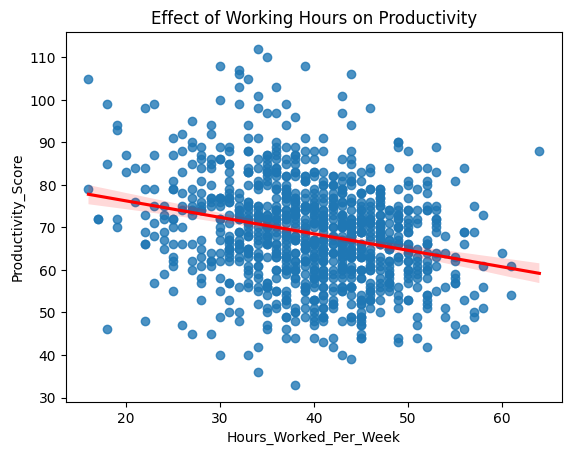

In [14]:


# Plot Regression
sns.regplot(x='Hours_Worked_Per_Week', y='Productivity_Score', data=df, line_kws={'color':'red'})
plt.title('Effect of Working Hours on Productivity')
plt.show()




#### **Conclusion:**
- If the p-value from the t-test is less than 0.05, we reject the null hypothesis, indicating a significant difference in productivity between remote and on-site workforces.
- If the p-value from the correlation test is less than 0.05, we conclude that well-being significantly impacts productivity.
- If the regression analysis shows a significant p-value for working hours, we conclude that working hours significantly affect productivity.
